# Homework 1: Calibrate My Camera

## Submission Deadline: Oct 7, 11:59PM

### This assignment is to be submitted individually.

This assignment is adapted from CMSC733 from University of Maryland, College Park.
***

# Introduction:

Estimating parameters of the camera like the focal length, distortion coefficients and principle point is called Camera Calibration. It is one of the most time consuming and important part of any computer vision research involving 3D geometry. An automatic way to perform efficient and robust camera calibration would be wonderful. One such method was presented Zhengyou Zhang of Microsoft in [this paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr98-71.pdf) and is regarded as one of the hallmark papers in camera calibration. Recall that the camera calibration matrix K is given as follows:


$$ K = \begin{bmatrix} f_x & 0 & c_x \\
0 & f_y & c_y\\
0 & 0 & 1
\end{bmatrix}
$$

and radial distortion parameters are denoted by $k_1$ and $k_2$ respectively.




***

# Task:

A. The task is to estimate $f_x$, $f_y$, $c_x$, $c_y$, $k_1$ and $k_2$.

B. Submit the LaTeX $\texttt{report.pdf}$ in IEEE Tran/Conf format and Google colab output PDF + link to your Google colab.

C. Include the following in the submission report:

1. A $3\times3$ Calibration (K) Matrix
2. Distortion coefficients $k_1$ and $k_2$
3. K (After Non-Linear Minimization)
4. Reprojection Error
5. All the images of Checkerboard after rectification and reprojection of corners on rectified images.

#### Note: You are free to use functions such as $\texttt{cv2.findChessboardCorners}$ or any function that computes homography/perspective transformation. Alternatively, you are allowed to utilize any in-built function that you have already implemented in Project 1.
***

# Data:

The Zhang’s paper relies on a calibration target (checkerboard in our case) to estimate camera intrinsic parameters. The calibration target used can be found in the file [checkerboardPattern.pdf](https://github.com/cmsc733/cmsc733.github.io/raw/master/assets/2019/hw1/checkerboardPattern.pdf) Link. This was printed on an A4 paper and the size of each square was 21.5mm. Note that the Y axis has odd number of squares and X axis has even number of squares. It is a general practice to neglect the outer squares (extreme square on each side and in both directions). Thirteen images taken from a Google Pixel XL phone with focus locked can be downloaded from [here](https://github.com/cmsc733/cmsc733.github.io/raw/master/assets/2019/hw1/Calibration_Imgs.zip) or [here](https://drive.google.com/drive/folders/1-4oP9__FvpmysDwEqFzXfqKv6WJtNPx1) which you will use to calibrate.
***

# Initial Parameters Estimation:

We are trying to get a good initial estimate of the parameters so that we can feed it into the non-linear optimizer. We will define the parameters we are using in the code next.

$x$ denotes the image points, $X$ denotes the world points (points on the checkerboard), $k_s$ denotes the radial distortion parameters, $K$ denotes the camera calibration matrix, $R$ and $t$ represent the rotation matrix and the translation of the camera in the world frame.
<br>

### A. Solve for approximate $K$ or camera intrinsic matrix: [40pt]

Refer to Section 3.1 in [this paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr98-71.pdf) for a solution of parameters in K. Use cv2.findChessboardCorners function in OpenCV to find the corners of the Checker board with appropriate parameters here.


### B. Estimate approximate $R$ and $t$ or camera extrinsics: [20pt]

Refer to Section 3.1 in the same Zhang's paper for details on how to estimate $R$ and $t$. Note that the author mentions a method to convert a normal matrix to a rotation matrix in Appendix C, this can be neglected most of the times.

### C. Approximate Distortion $k_s$: [20pt]

Because we assumed that the camera has minimal distortion we can assume that $k_s=[0,0]^T$ for a good initial estimate.
<br><br>


<br>

# Non-Linear Geometric Error Minimization: [10pt]

We have the initial estimates of $K,R,t,k_s$, now we want to minimize the geometric error defined as given below

$$∑_{i=1}^N ∑_{j=1}^M||x_{i,j}−\hat{x}_{i,j} (K,R_i,t_i,X_j,k_s)||$$


Here $x_{i,j}$ and $\hat{x}_{i,j}$ are an inhomogeneous representation. Feel free to use $\texttt{scipy.optimize}$ to minimize the loss function described above. Refer to Section 3.3 in the same Zhang's paper for a detailed explanation of the distortion model, you’ll need this part for the minimization function.
<br>

# Plot Undistorted Images [10pt]

<hr>

# Step 1: Load all the input images and define save folder where you will save the undistorted images


/content/drive/MyDrive/Checkerboard/IMG_20170209_042606.jpeg


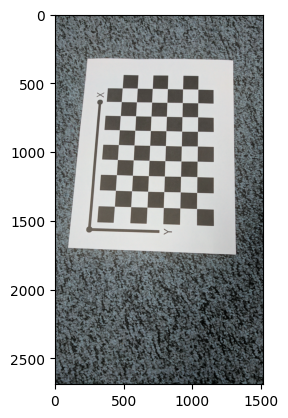

/content/drive/MyDrive/Checkerboard/IMG_20170209_042608.jpeg


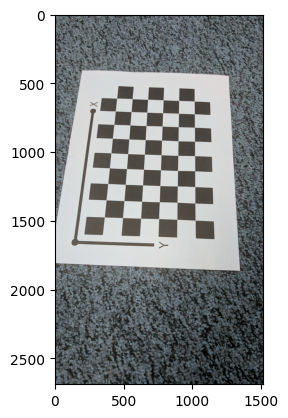

/content/drive/MyDrive/Checkerboard/IMG_20170209_042610.jpeg


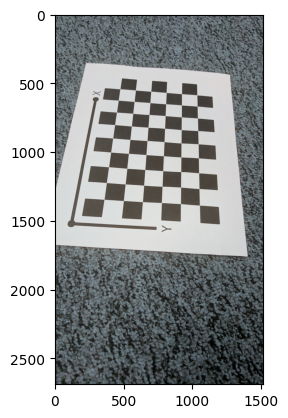

/content/drive/MyDrive/Checkerboard/IMG_20170209_042612.jpeg


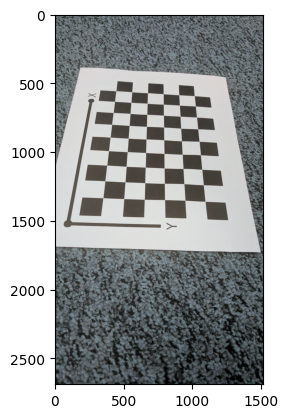

/content/drive/MyDrive/Checkerboard/IMG_20170209_042614.jpeg


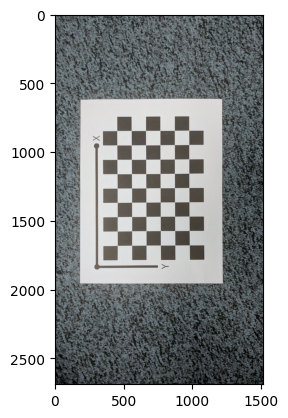

/content/drive/MyDrive/Checkerboard/IMG_20170209_042616.jpeg


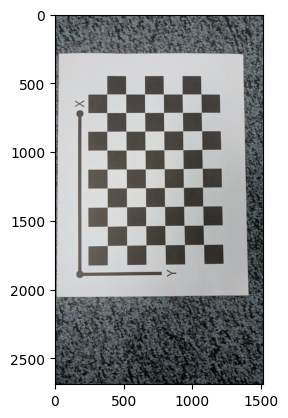

/content/drive/MyDrive/Checkerboard/IMG_20170209_042619.jpeg


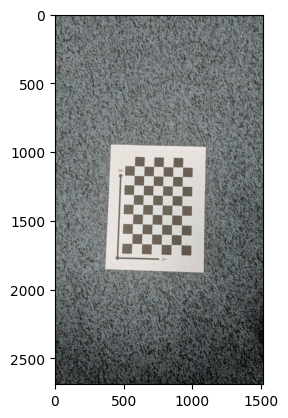

/content/drive/MyDrive/Checkerboard/IMG_20170209_042621.jpeg


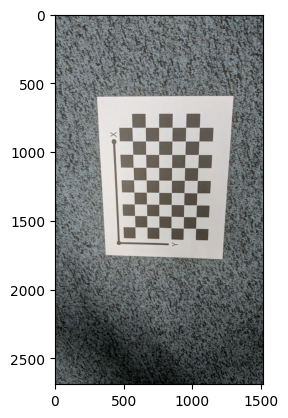

/content/drive/MyDrive/Checkerboard/IMG_20170209_042624.jpeg


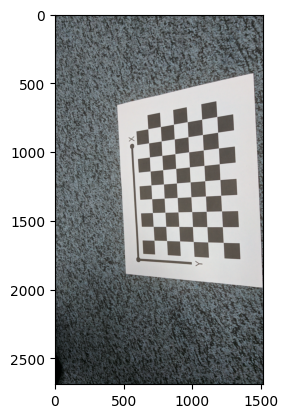

/content/drive/MyDrive/Checkerboard/IMG_20170209_042627.jpeg


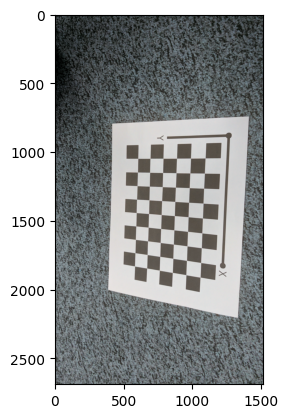

/content/drive/MyDrive/Checkerboard/IMG_20170209_042629.jpeg


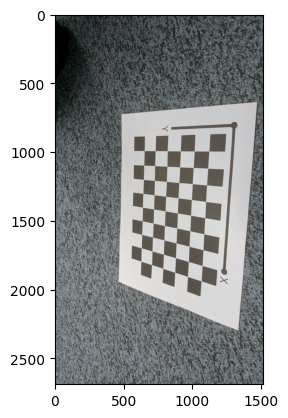

/content/drive/MyDrive/Checkerboard/IMG_20170209_042630.jpeg


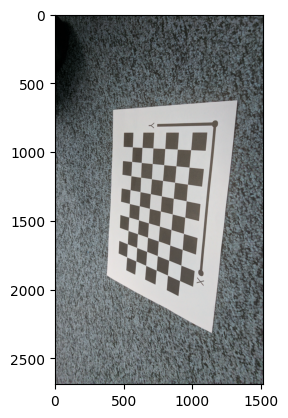

/content/drive/MyDrive/Checkerboard/IMG_20170209_042634.jpeg


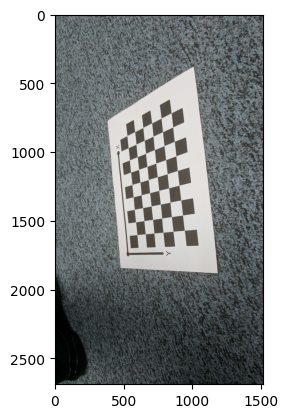

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

def load_images_from_directory(directory):
    file_list = os.listdir(directory)
    image_files = [file for file in file_list if file.endswith(".jpeg")]
    images = []
    filenames = []

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = cv2.imread(image_path)

        if img is not None:
            images.append(img)
            filenames.append(image_file)
        else:
            print(f"Error loading image: {image_file}")

    return images, filenames

def save_image_to_directory(image, output_directory, filename):
    os.makedirs(output_directory, exist_ok=True)
    save_path = os.path.join(output_directory, filename)

    cv2.imwrite(save_path, image)
    print(f"Saved image: {save_path}")

file_list = os.listdir("/content/drive/MyDrive/Checkerboard")
image_files = [file for file in file_list if file.endswith(".jpeg")]
for image_file in image_files:
    image_path = os.path.join("/content/drive/MyDrive/Checkerboard",image_file)
    print(image_path)
    img = cv2.imread(image_path)
    plt.imshow(img)
    plt.show()

# Step 2: Get all Corners
It is a good practice to ignore the corners on the edges of the checkerboard (not required though).
In this step, write a function $\texttt{get_corners}$:

In [3]:
def get_corners(images, Nx, Ny):
    corner_list = []
    corner_status_list = []
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (Nx, Ny), None)

        if ret:
            # If corners are found, refine and store them
            corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            corner_list.append(corners.reshape(-1, 2))
            corner_status_list.append(True)
        else:
            # If no corners found, append None and update status list
            corner_list.append(None)
            corner_status_list.append(False)

    return corner_list, corner_status_list

In [ ]:
# l,s= get_corners(image_files,6,9)

# Step 3: Get Homographies

In [ ]:
import numpy as np
import cv2

def get_homographies(corner_list, Nx, Ny, SquareSize=21.5):
    """
    Computes homography matrices for multiple images using detected corners and chessboard world coordinates.

    Args:
    - corner_list: List of detected corner points (Nx1x2 arrays) for each image where detection was successful.
    - Nx: The number of inner corners along the x-axis of the checkerboard pattern.
    - Ny: The number of inner corners along the y-axis of the checkerboard pattern.
    - SquareSize: Size of each square on the checkerboard in millimeters (real-world units).

    Returns:
    - H_list: List of 3x3 homography matrices, where each matrix represents a transformation
              between world points and their corresponding image points for each scene.
    - Pw: A grid of points representing the real-world 2D coordinates of the checkerboard corners (Nx * Ny, 2).
    """

    # Initialize the world points (real-world coordinates on the 2D plane)
    # Pw = np.empty([Nx * Ny, 2], dtype=np.float32)

    # Populate the world points for the checkerboard
    # x, y = np.meshgrid(np.linspace(0,Nx-1,Nx), np.linspace(0,Ny-1,Ny))
    # x = np.flip((x.reshape(54, 1) * SquareSize), axis=0)
    # y = (y.reshape(54,1)*SquareSize)
    # M = np.float32(np.hstack((y,x)))
    # Pw = M
    Pw = np.zeros((Nx * Ny, 2), dtype=np.float32)
    for i in range(Ny):
        for j in range(Nx):
            Pw[i * Nx + j] = [j * SquareSize, i * SquareSize]


    H_list = []  # List to store homographies

    # Loop through each set of detected corners in the images
    for Pc in corner_list:
        if Pc is not None:
            # Reshape Pc from (N, 1, 2) to (N, 2) to remove the unnecessary dimension

            # Compute the homography using cv2.findHomography
            H, _ = cv2.findHomography(Pw, Pc, cv2.RANSAC)

            if H is not None:
                # Append the homography matrix to the list
                H_list.append(H)
            else:
                print("Warning: Homography computation failed for one image.")

    return H_list, Pw


In [ ]:
H_list,Pw = get_homographies(l,6,9)

In [ ]:
H_list

[array([[-5.50803643e+00,  5.83495566e-01,  1.03160056e+03],
        [-6.25723181e-03, -4.77982814e+00,  1.41630803e+03],
        [ 1.08272132e-04,  5.03663312e-04,  1.00000000e+00]]),
 array([[-6.12278287e+00,  9.54037808e-01,  1.02052848e+03],
        [-2.08862688e-01, -4.42001190e+00,  1.50007819e+03],
        [ 3.56079786e-06,  9.72124034e-04,  1.00000000e+00]]),
 array([[-6.49036858e+00,  1.31645623e+00,  1.05250369e+03],
        [-5.51387620e-01, -3.85444549e+00,  1.39191318e+03],
        [-1.12872043e-04,  1.37822524e-03,  1.00000000e+00]]),
 array([[-6.99276654e+00,  1.30580272e+00,  1.09306405e+03],
        [-5.48520544e-01, -3.42980477e+00,  1.36309486e+03],
        [-2.39447741e-04,  1.73194666e-03,  1.00000000e+00]]),
 array([[-4.84128554e+00, -4.13967594e-02,  9.77139964e+02],
        [ 2.42696146e-02, -4.85583055e+00,  1.67830026e+03],
        [-8.43165990e-06, -2.91229718e-05,  1.00000000e+00]]),
 array([[-6.51257424e+00,  1.62720620e-02,  1.08191084e+03],
        [-9.26

# Step 4: Closed-Form Solution: Estimate B Matrix using Homography
(As given in Zhang's calibration paper - Sec 3.1)

In [ ]:
def get_B(H_list):
    """
    Input:
    H_list : List of 3x3 homography matrices.

    Output:
    B : 3x3 symmetric matrix, which encodes the intrinsic camera parameters.
    """

    def compute_v(H, i, j):
        """
        Compute the v(H, i, j) elements of the homography matrix.
        """

        return np.array([
            H[0, i] * H[0, j],
            H[0, i] * H[1, j] + H[1, i] * H[0, j],
            H[1, i] * H[1, j],
            H[2, i] * H[0, j] + H[0, i] * H[2, j],
            H[2, i] * H[1, j] + H[1, i] * H[2, j],
            H[2, i] * H[2, j]
        ])

    V = []

    # Loop through each homography matrix in the list
    for H in H_list:
        v12 = compute_v(H, 0, 1)  # v(H, 1, 2)
        v11 = compute_v(H, 0, 0)  # v(H, 1, 1)
        v22 = compute_v(H, 1, 1)  # v(H, 2, 2)

        # Append to the V matrix
        V.append(v12)
        V.append((v11 - v22).T)

    # Convert the list of V to a numpy array
    V = np.array(V)

    # Solve Vb = 0 using SVD
    U, S, vh = np.linalg.svd(V)


    # print("Singular values:", S)

    # Extract the solution as the last row of vh (smallest singular value)
    b = vh[-1, :]

    # Construct the symmetric matrix B from the vector b
    B = np.array([
        [b[0], b[1], b[3]],
        [b[1], b[2], b[4]],
        [b[3], b[4], b[5]]
    ])

    return B

In [ ]:
B= get_B(H_list)
B

Singular values: [1.21194545e+02 8.84388059e+01 4.17954955e+01 2.70418065e-02
 1.04183720e-02 1.71065248e-07]


array([[ 1.50316220e-07,  1.21416274e-10, -1.15037986e-04],
       [ 1.21416274e-10,  1.52199319e-07, -2.07758825e-04],
       [-1.15037986e-04, -2.07758825e-04,  9.99999972e-01]])

# Step 5: Estimate A (Or the initial Camera Calibration K Matrix) of the form:

    [  fx   s    u0 ]
    [  0    fy   v0 ]
    [  0     0    1 ]

In [ ]:
# import numpy as np

# def get_A(B):
#     """
#     Input:
#       B : np.ndarray
#           A 3x3 symmetric matrix derived from the homographies, encoding the intrinsic
#           parameters of the camera in a non-intuitive form. This matrix is used to calculate
#           the camera's intrinsic parameters like focal lengths, skew, and principal points.

#     Output:
#       A : np.ndarray
#           A 3x3 intrinsic camera matrix containing the camera's internal parameters:
#           - Focal lengths (fx, fy)
#           - Principal point (u0, v0)
#           - Skew (skew)

#           The matrix has the form:
#           [[fx, skew,  u0],
#            [ 0,    fy,  v0],
#            [ 0,     0,   1]]
#     """

#     # Extract elements from B
#     v0 = B[1, 2] / B[1, 1] # Vertical principal point (y-coordinate)
#     u0 = B[0, 2] / B[0, 0] # Horizontal principal point (x-coordinate)

#     # Compute the scale factor
#     l = B[0, 0] + B[1, 1] - B[2, 2]

#     # Compute focal lengths
#     a = np.sqrt(B[0, 0] * B[0, 0] + B[0, 1] * B[1, 0])  # Focal length in x-direction (fx)
#     b = np.sqrt(B[1, 1] * B[1, 1] + B[0, 1] * B[1, 0])  # Focal length in y-direction (fy)

#     # Compute skew (assume it is small)
#     skew = B[0, 1] / b  # Usually close to 0

#     # Construct the intrinsic camera matrix A
#     A = np.array([[a, skew, u0],   # First row of intrinsic matrix
#                   [0,  b, v0],    # Second row of intrinsic matrix
#                   [0,  0, 1]])    # Third row (homogeneous coordinates)

#     return A  # Return the in # Return the intrinsic matrix A

import numpy as np

def get_A(B):
    """
    Input:
      B : np.ndarray
          A 3x3 symmetric matrix derived from the homographies, encoding the intrinsic
          parameters of the camera in a non-intuitive form. This matrix is used to calculate
          the camera's intrinsic parameters like focal lengths, skew, and principal points.

    Output:
      A : np.ndarray
          A 3x3 intrinsic camera matrix containing the camera's internal parameters:
          - Focal lengths (fx, fy)
          - Principal point (u0, v0)
          - Skew (skew)

          The matrix has the form:
          [[fx, skew,  u0],
           [ 0,    fy,  v0],
           [ 0,     0,   1]]
    """

    # Extract elements from B
    v0 = B[1, 2] / B[1, 1]
    u0 = B[0, 2] / B[0, 0]

    # Compute the scale factor lambda ensuring it's positive
    lambda_scale = B[2, 2] - ((u0**2) * B[0, 0] + 2 * u0 * v0 * B[0, 1] + (v0**2) * B[1, 1])
    if lambda_scale <= 0:
        raise ValueError("Invalid lambda scale computed, leading to negative values for focal lengths.")

    # Compute focal lengths
    fx = np.sqrt(lambda_scale / B[0, 0])
    fy = np.sqrt(lambda_scale / B[1, 1])

    # Compute skew
    skew = B[0, 1] / np.sqrt(B[0, 0] * B[1, 1])

    # Construct the intrinsic camera matrix A
    A = np.array([[fx, skew, u0],
                  [0,  fy,   v0],
                  [0,  0,    1]])

    return A


In [ ]:
A = get_A(B)
A

array([[ 2.04415525e+03,  8.02726546e-04, -7.65306543e+02],
       [ 0.00000000e+00,  2.03147015e+03, -1.36504439e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

# Step 6: Get Transformations from Initial K and Homographies

In [ ]:
import numpy as np

def get_all_transformations(A, H_list):
    """
    Input:
        A : np.ndarray
            The 3x3 intrinsic camera matrix, which contains the camera's internal parameters
            like focal lengths (fx, fy), skew (g), and the principal point (u0, v0).

        H_list : List[np.ndarray]
            A list of 3x3 homography matrices, where each matrix represents a transformation
            between world points and image points for a specific scene or image.

    Output:
        T_list : List[np.ndarray]
            A list of 3x4 transformation matrices, where each matrix contains the camera's
            rotation (r1, r2, r3) and translation (t) for a specific homography. Each transformation
            matrix maps world coordinates to camera coordinates.
    """

    # Compute the inverse of the intrinsic matrix A
    Ainv = np.linalg.inv(A)

    # Initialize a list to store the transformation matrices (rotation and translation)
    T_list = []

    # Loop through each homography matrix in the list
    for H in H_list:
        # Step 1: Normalize the homography using the intrinsic matrix A
        h1, h2, h3 = H[:, 0], H[:, 1], H[:, 2]  # Extract columns from the homography matrix
        lamda = 1 / np.linalg.norm(np.dot(Ainv, h1))  # Scaling factor

        # Step 2: Calculate the rotation vectors (r1, r2) from the homography
        r1 = lamda * np.dot(Ainv, h1)  # First column -> first rotation vector
        r2 = lamda * np.dot(Ainv, h2)  # Second column -> second rotation vector

        # Step 3: Calculate the third rotation vector (r3) as the cross product of r1 and r2
        r3 = np.cross(r1, r2)

        # Step 4: Compute the translation vector t from the third column of the homography
        t = lamda * np.dot(Ainv, h3)

        # Step 5: Stack the rotation and translation vectors to form a 3x4 matrix
        T = np.column_stack((r1, r2, r3, t))  # Combine r1, r2, r3, and t

        # Append the transformation matrix to the list
        T_list.append(T)

    # Return the list of transformation matrices
    return T_list


In [ ]:
T_list = get_all_transformations(A,H_list)
T_list

[array([[-9.98825330e-01,  1.78393469e-01,  3.58628711e-02,
          3.30827152e+02],
        [ 2.62213739e-02, -7.58136229e-01,  1.96599218e-01,
          5.15270451e+02],
        [ 4.07480049e-02,  1.89552702e-01,  7.52567947e-01,
          3.76348043e+02]]),
 array([[-9.99437252e-01,  2.77294177e-01, -1.02744597e-02,
          2.91635963e+02],
        [-3.35226206e-02, -5.08260195e-01,  3.24662587e-01,
          4.70811059e+02],
        [ 1.18866976e-03,  3.24515596e-01,  5.17269800e-01,
          3.33821184e+02]]),
 array([[-9.93621083e-01,  3.58246242e-01, -5.61051198e-02,
          2.74636178e+02],
        [-1.07247485e-01, -2.99960109e-01,  4.10437997e-01,
          4.19124431e+02],
        [-3.48585826e-02,  4.25641082e-01,  3.36467697e-01,
          3.08832744e+02]]),
 array([[-9.90283674e-01,  3.63113257e-01, -6.93831044e-02,
          2.56453261e+02],
        [-1.21555576e-01, -1.47972917e-01,  4.59293472e-01,
          3.78831531e+02],
        [-6.75461772e-02,  4.88567465

# Step 7: Compute Reprojection Error

In [ ]:
def get_reprojection_error(A, k1, k2, T_list, Pc_list, Pw):
    """
    Input:
    A : np.ndarray
        The 3x3 intrinsic camera matrix containing the camera's internal parameters (focal lengths, principal points, skew).

    k1 : float
        The first radial distortion coefficient. This corrects for lens distortion by adjusting the points based on the amount of radial distortion.

    k2 : float
        The second radial distortion coefficient. This is used for higher-order corrections of radial distortion.

    T_list : List
        A list of 3x4 transformation matrices (one for each image), each of which combines the camera's rotation and translation
        relative to the world scene.

    Pc_list : List
        A list of 2D points (image coordinates) detected in each image. Each item in the list corresponds to an image and contains
        the 2D image coordinates of the checkerboard corners or other known points.

    Pw : np.ndarray
        The 3D world coordinates (in real space) of the checkerboard corners or other known points used for calibration.
        This is a (N x 2) array, where N is the number of world points.

    Output:
    reproj_error : float
        The average reprojection error over all the images and points. This error quantifies the difference between the observed 2D points
        and the projected points from the 3D world points.

    RPc_list : List
        A list of reprojected 2D points. For each image, this is the result of projecting the world points (`Pw`) back onto the image plane
        using the intrinsic matrix `A` and the transformation matrices in `T_list`.
    """

    RPc_list = []  # List to store reprojected 2D points for each image
    reproj_error = 0  # Initialize total error

    # Loop through each set of 2D image points (Pc) and transformation matrix (T)
    for Pc, T in zip(Pc_list, T_list):
        # Compute the 3D homogeneous coordinates of the world points projected into the camera frame
        Pw_homogenenous = np.column_stack((Pw, np.zeros((Pw.shape[0], 1)), np.ones((Pw.shape[0], 1))))
        P_camera = T @ Pw_homogenenous.T

        # Normalize the projected 3D points by their third coordinate to convert them to 2D homogeneous coordinates
        P_camera /= P_camera[2, :]  # Normalize by the third row

        # Reproject the normalized points using the intrinsic matrix A
        P_reprojected_2d = A @ P_camera

        # Extract the 2D coordinates
        # Append the reprojected 2D points to the list
        x = P_reprojected_2d[0, :] / P_reprojected_2d[2, :]
        y = P_reprojected_2d[1, :] / P_reprojected_2d[2, :]
        Uhat = np.vstack((x, y)).T

        # Compute the radial distortion
        u0, v0 = A[0, 2], A[1, 2]
        r = np.sqrt((Uhat[:, 0] - u0)**2 + (Uhat[:, 1] - v0)**2)

        # Apply radial distortion
        rad_dist = 1 + k1 * r + k2 * r**2
        Uhat_distorted = np.zeros_like(Uhat)
        Uhat_distorted[:, 0] = Uhat[:, 0] + (Uhat[:, 0] - u0) * (rad_dist - 1)
        Uhat_distorted[:, 1] = Uhat[:, 1] + (Uhat[:, 1] - v0) * (rad_dist - 1)

        # Store the reprojected and distorted points
        RPc_list.append(Uhat_distorted)

        # Compute the reprojection error
        reprojection_errors = np.linalg.norm(Pc - Uhat_distorted, axis=1)**2
        reproj_error += np.sum(reprojection_errors)



    # Compute the average reprojection error by dividing the total error by the number of points and images
    reproj_error /= Pw.shape[0] * len(Pc_list)

    # Return the average reprojection error and the list of reprojected 2D points
    return reproj_error, RPc_list

# Step 8: Define Objective Function for Minimization

In [ ]:
import numpy as np

def objective_function(x, T_list, Pc_list, Pw):
    A = np.array([[x[0], x[1], x[2]],  # fx, skew, u0
                  [0, x[3], x[4]],     # 0, fy, v0
                  [0, 0, 1]])          # homogeneous coordinate row

    k1 = x[5]
    k2 = x[6]

    reproj_error = 0

    # Loop through each set of 2D image points (Pc) and transformation matrix (T)
    for Pc, T in zip(Pc_list, T_list):

        Pw_homogenenous = np.column_stack((Pw, np.zeros((Pw.shape[0], 1)), np.ones((Pw.shape[0], 1))))
        P_camera = T @ Pw_homogenenous.T

        #  Normalize the projected 3D points by their third coordinate to convert them to 2D homogeneous coordinates
        P_camera /= P_camera[2, :]

        # Reproject the normalized points using the intrinsic matrix A
        P_reprojected_2d = A @ P_camera


        x = P_reprojected_2d[0, :] / P_reprojected_2d[2, :]
        y = P_reprojected_2d[1, :] / P_reprojected_2d[2, :]
        Uhat = np.vstack((x, y)).T  # Reprojected points without distortion

        # Compute the radial distortion
        u0, v0 = A[0, 2], A[1, 2]
        r = np.sqrt((Uhat[:, 0] - u0)**2 + (Uhat[:, 1] - v0)**2)

        # Apply radial distortion
        rad_dist = 1 + k1 * r + k2 * r**2
        Uhat_distorted = np.zeros_like(Uhat)
        Uhat_distorted[:, 0] = Uhat[:, 0] + (Uhat[:, 0] - u0) * (rad_dist - 1)
        Uhat_distorted[:, 1] = Uhat[:, 1] + (Uhat[:, 1] - v0) * (rad_dist - 1)


        # Compute the reprojection error
        reprojection_errors = np.linalg.norm(Pc - Uhat_distorted, axis=1)**2


    return reproj_error


# Step 9 and 10: Put Everything together, minimize and rectify images
(Feel free to use $\texttt{minimize}$ from $\texttt{scipy.optimize}$).



Singular values: [1.21194545e+02 8.84388059e+01 4.17954955e+01 2.70418065e-02
 1.04183720e-02 1.71065248e-07]
Initial Calibration K Matrix:  [[ 2.04415525e+03  8.02726546e-04 -7.65306543e+02]
 [ 0.00000000e+00  2.03147015e+03 -1.36504439e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Initial Reprojection Error:  0.8200869651967471


Optimized Calibration K Matrix : [[ 2.04486868e+03  9.79831630e-04 -7.65711034e+02]
 [ 0.00000000e+00  2.03146073e+03 -1.36476150e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Optimized Distortion coefficients : 

k1 :  -1.7662139263962626e-07
k2 :  4.7066777708347974e-11


Final reprojection error :  0.8093571081912138
Saved undistorted image: check\IMG_20170209_042606.jpeg


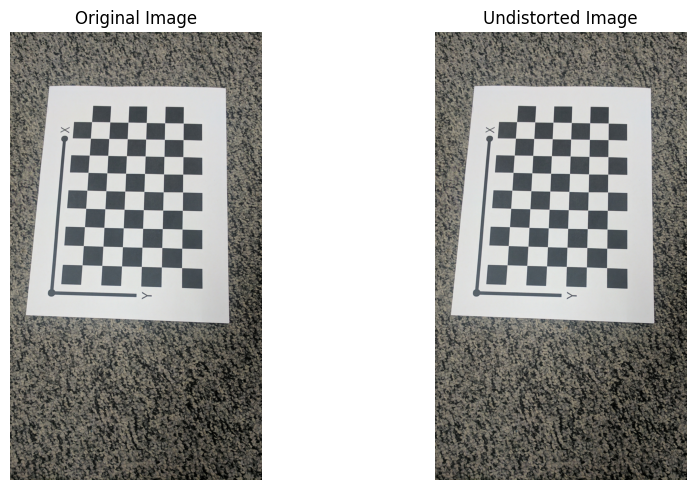

Saved undistorted image: check\IMG_20170209_042608.jpeg


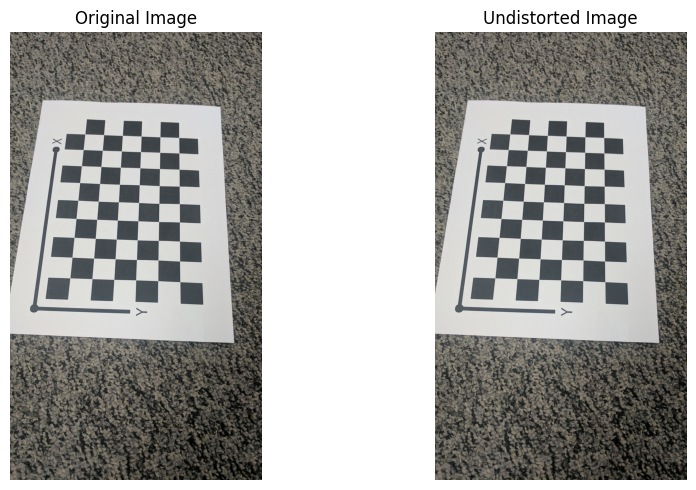

Saved undistorted image: check\IMG_20170209_042610.jpeg


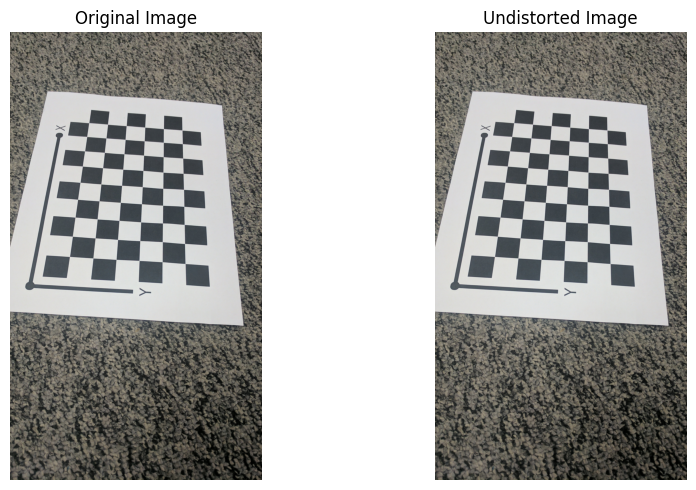

Saved undistorted image: check\IMG_20170209_042612.jpeg


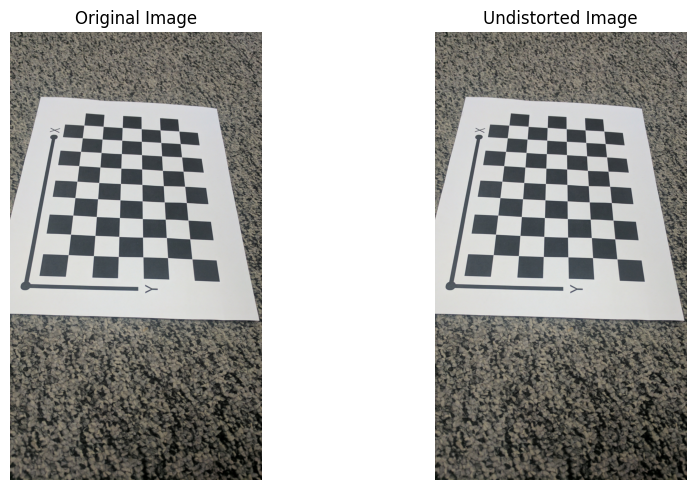

Saved undistorted image: check\IMG_20170209_042614.jpeg


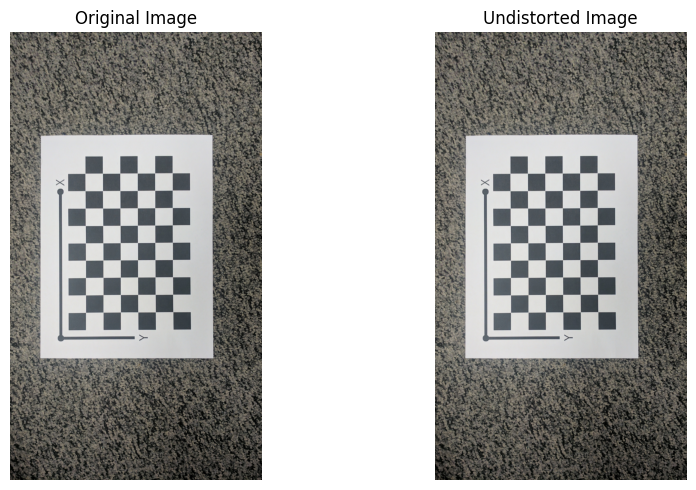

Saved undistorted image: check\IMG_20170209_042616.jpeg


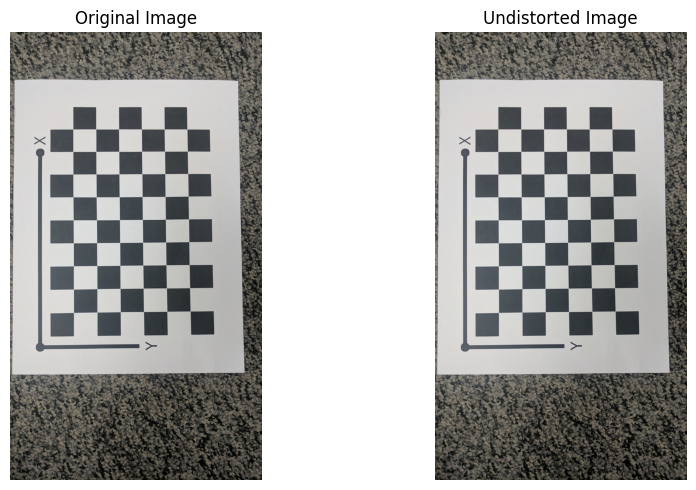

Saved undistorted image: check\IMG_20170209_042619.jpeg


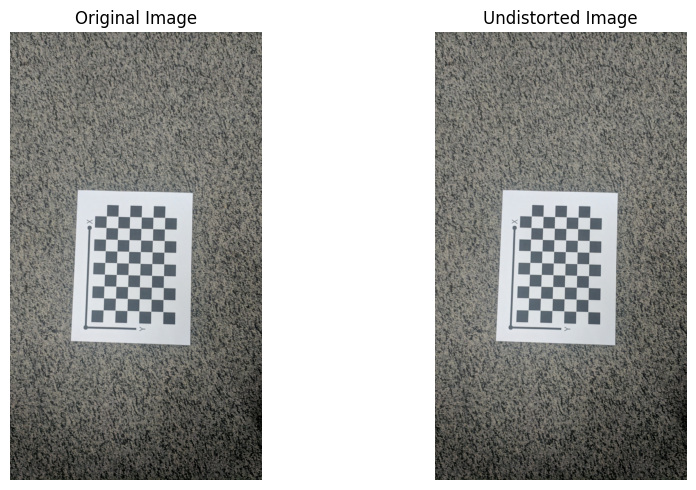

Saved undistorted image: check\IMG_20170209_042621.jpeg


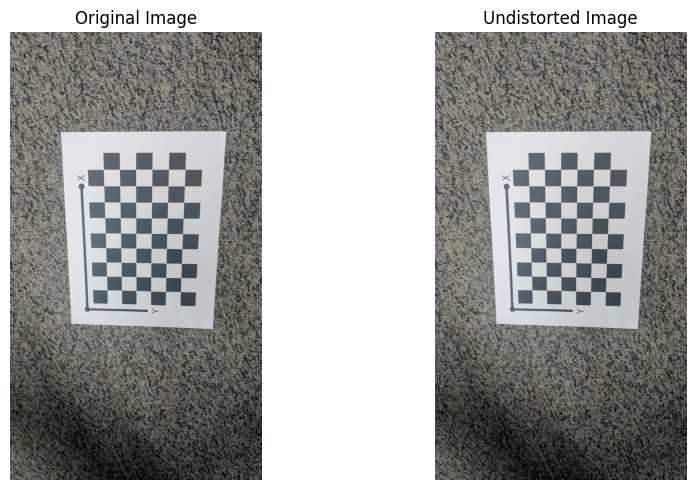

Saved undistorted image: check\IMG_20170209_042624.jpeg


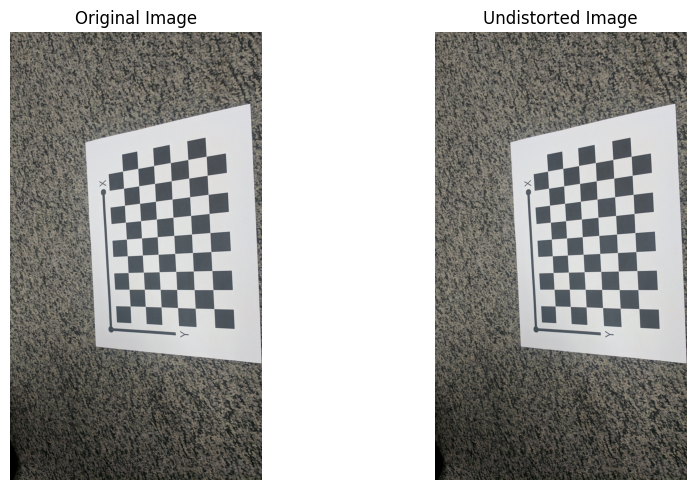

Saved undistorted image: check\IMG_20170209_042627.jpeg


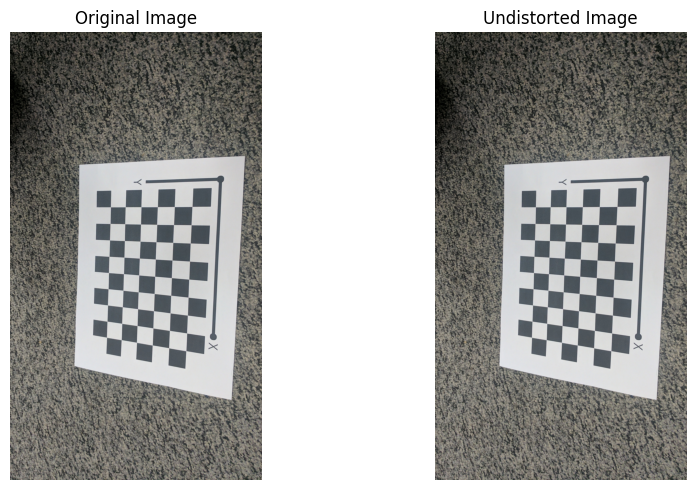

Saved undistorted image: check\IMG_20170209_042629.jpeg


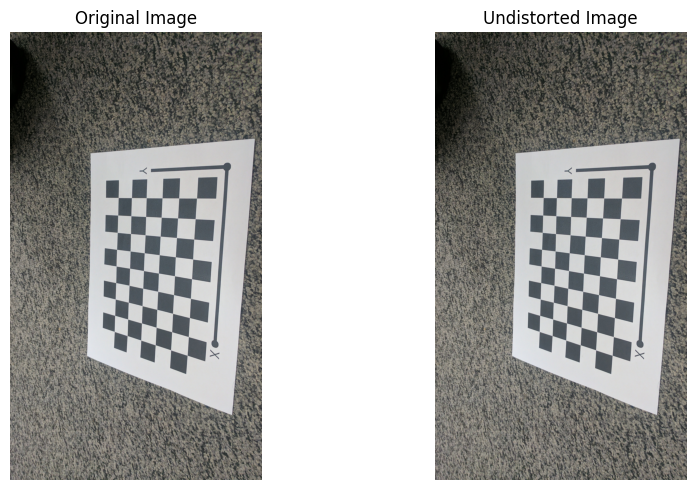

Saved undistorted image: check\IMG_20170209_042630.jpeg


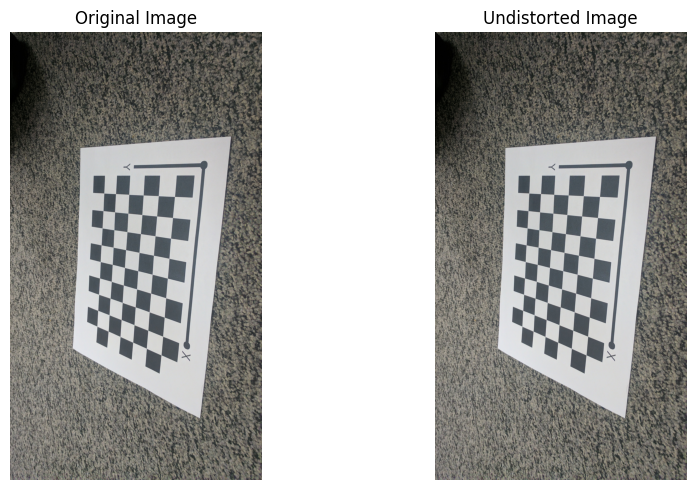

Saved undistorted image: check\IMG_20170209_042634.jpeg


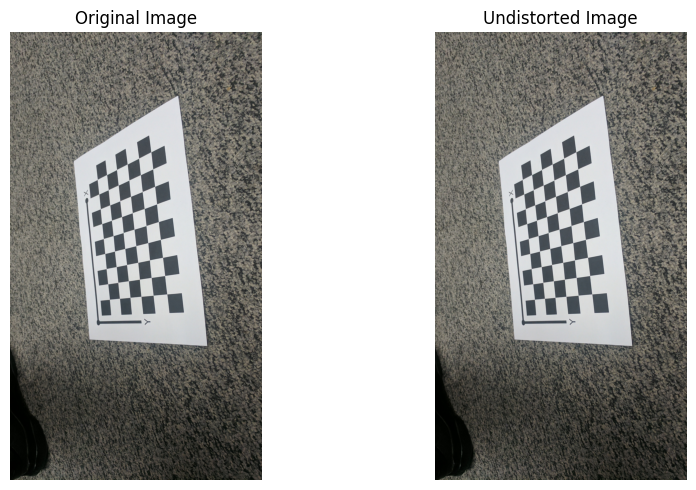

In [ ]:
    import os
    import cv2
    import numpy as np
    from scipy.optimize import minimize
    # a_OP = None

    Nx = 6
    Ny = 9

    # k1_op,k2_op = None,None
    # A_op =None


    def main():
        """
        Main function to perform camera calibration and reprojection error optimization.
        """

        # Step 1: Load input image path and create image path list
        images, image_filenames = load_images_from_directory("/content/drive/MyDrive/Checkerboard")
        # img_dir = os.listdir("/content/drive/MyDrive/Checkerboard")
        # image_files = [file for file in img_dir if file.endswith(".jpeg")]
        # images = load_images_from_directory("/content/drive/MyDrive/Checkerboard")
        # file_list = os.listdir("/content/drive/MyDrive/Checkerboard")
        # img_path_list = [file for file in file_list if file.endswith(".jpeg")]
        # for image_file in img_path_list:
        #     image_path = os.path.join("/content/drive/MyDrive/Checkerboard",image_file)
        #     img = cv2.imread(image_path)  # Folder to save undistorted images
        # Get list of images from directory
        # img_path_list = [os.path.join(img_folder, f) for f in os.listdir(img_folder) if f.endswith('.jpeg')]
        # print(f"Number of images: {len(img_path_list)}")

        # Step 2: Detect corners in the images
        corner_list, corner_status_list = get_corners(img_path_list, Nx, Ny)

        # Step 3: Calculate homographies from detected corners
        H_list, Pw = get_homographies(corner_list, Nx, Ny)

        # Step 4: Get B Matrix
        B = get_B(H_list)

        # Step 5: Compute initial intrinsic matrix (A)
        A_initial = get_A(B)
        print("Initial Calibration K Matrix: ", A_initial)
        print("\n")

        # Step 6: Calculate the transformations for each homography using the initial intrinsic matrix
        T_list = get_all_transformations(A_initial, H_list)

        # Step 7: Compute initial reprojection error with no distortion coefficients
        k1, k2 = 0, 0  # Initially no distortion coefficients
        reproj_error, RPc_list = get_reprojection_error(A_initial, k1, k2, T_list, corner_list, Pw)
        print("Initial Reprojection Error: ", reproj_error)
        print("\n")

        # Step 8: Use optimization techniques to minimize reprojection error and refine intrinsic matrix and distortion coefficients
        # Define the objective function for optimization

        # Initialize for the optimization (including the intrinsic parameters and distortion coefficients)
        x0 = np.array([A_initial[0, 0], A_initial[0, 1], A_initial[0, 2], A_initial[1, 1], A_initial[1, 2], 0, 0])

        # Optimize using Nelder-Mead method to minimize the reprojection error
        res = minimize(objective_function, x0, args=(T_list, corner_list, Pw), method='Nelder-Mead')

        # Extract optimized parameters
        x = res.x
        A_optimized = np.array([[x[0], x[1], x[2]], [0, x[3], x[4]], [0, 0, 1]])
        k1_optimized, k2_optimized = x[5], x[6]
        # k1_optimized,k2_optimized = 2.88970165e-01, -2.39883441e+00
        # k1_op,k2_op=k1_optimized,k2_optimized# Optimized distortion coefficients
        print("Optimized Calibration K Matrix :", A_optimized)
        print("\n")
        print("Optimized Distortion coefficients :", "\n")
        print("k1 : ", k1_optimized)
        print("k2 : ", k2_optimized)
        print("\n")

        # Step 9: Compute the final reprojection error after optimization
        final_error, RPc_list = get_reprojection_error(A_optimized, k1_optimized, k2_optimized, T_list, corner_list, Pw)
        print("Final reprojection error : ", final_error)

        # Step 10: Undistort and save each image with reprojected corners
        pic_num=0
        for img in images:
            # print(img)
            # img = cv2.imread(img[0])
            und_img = img.copy()
            pic_num+=1
            undistorted_img = cv2.undistort(und_img, A_optimized,np.array([k1_optimized, k2_optimized, 0, 0, 0]))
            save_image_to_directory(undistorted_img, "/content/drive/MyDrive/output_undistort", str(pic_num)+".png")
            img_dup = undistorted_img.copy()
            ret,corners = cv2.findChessboardCorners(img_dup, (Nx, Ny))
            cv2.drawChessboardCorners(img_dup, (Nx, Ny), corners, ret)
            plt.imshow(cv2.cvtColor(img_dup, cv2.COLOR_BGR2RGB))
            plt.savefig(f'/content/drive/MyDrive/undistorted_corner_detected/result{pic_num}.png')  # Save with unique filenames
            plt.close()
        # To Plot
        # output_directory = "check"
        # os.makedirs(output_directory, exist_ok=True)

        # for image_file in img_path_list:
        #     image_path = os.path.join("./checkerboard", image_file)
        #     img = cv2.imread(image_path)

        #     undistorted_img = cv2.undistort(img, A_optimized,np.array([k1_optimized, k2_optimized, 0, 0, 0]))


        #     if undistorted_img is None or undistorted_img.size == 0:
        #         print(f"Error undistorting image: {image_path}")
        #         continue
        # # Create the save path
        #     save_path = os.path.join(output_directory, os.path.basename(image_path))

        #     # Save the undistorted image
        #     cv2.imwrite(save_path, undistorted_img)

        #     print(f"Saved undistorted image: {save_path}")  # Print the saved path for confirmation

        #     # Display the original and undistorted images side by side
        #     plt.figure(figsize=(10, 5))

        #     # Show original image
        #     plt.subplot(1, 2, 1)
        #     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
        #     plt.title("Original Image")
        #     plt.axis('off')  # Turn off axis

        #     # Show undistorted image
        #     plt.subplot(1, 2, 2)
        #     plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
        #     plt.title("Undistorted Image")
        #     plt.axis('off')  # Turn off axis

        #     plt.tight_layout()  # Adjust layout to avoid overlap
        #     plt.show()

    if __name__ == "__main__":
        main()

Saved row image: output_rows/row_0.png


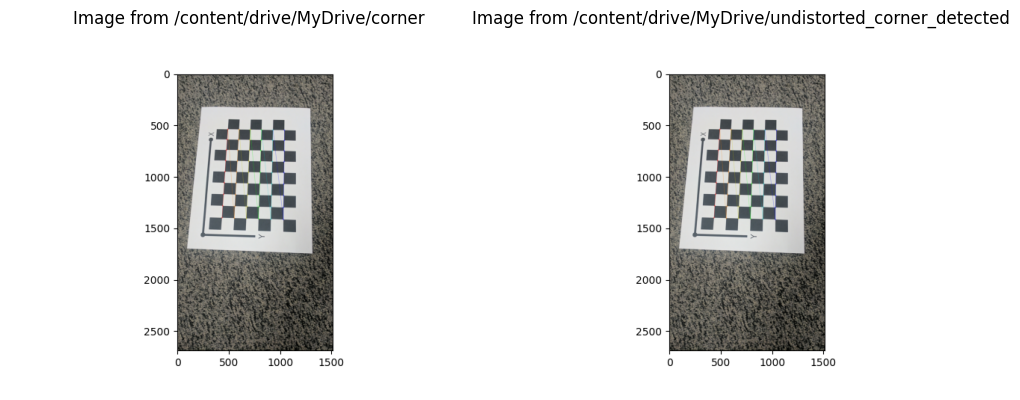

Saved row image: output_rows/row_1.png


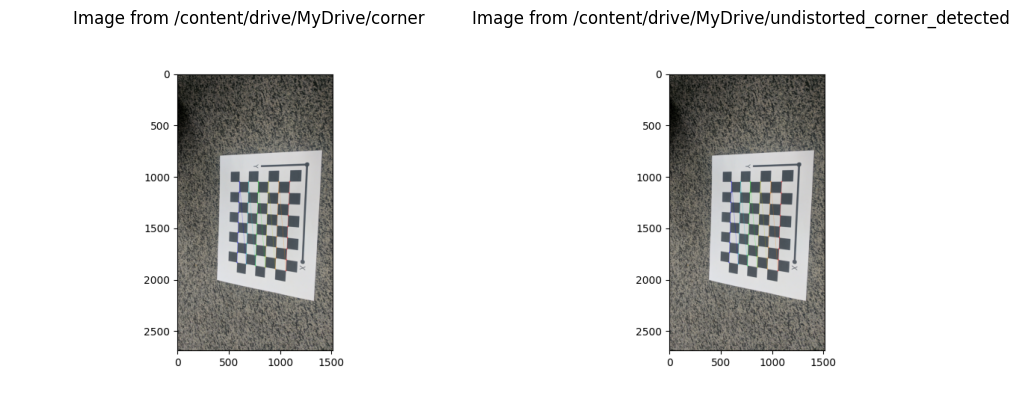

Saved row image: output_rows/row_2.png


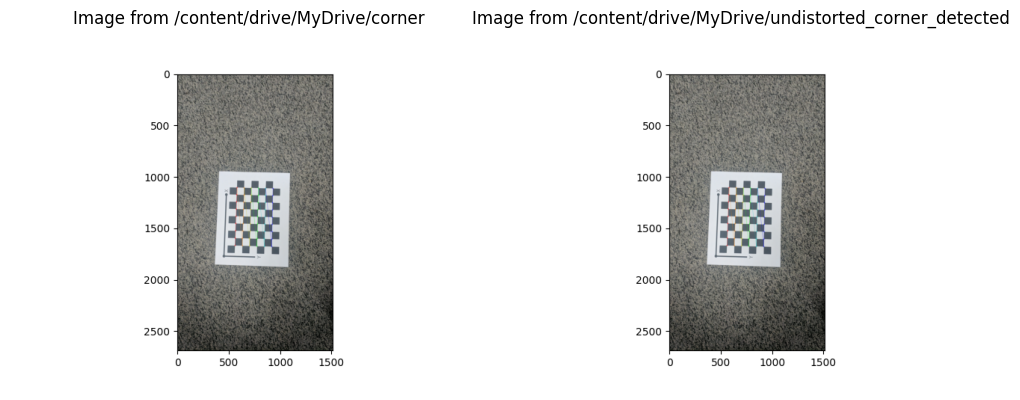

Saved row image: output_rows/row_3.png


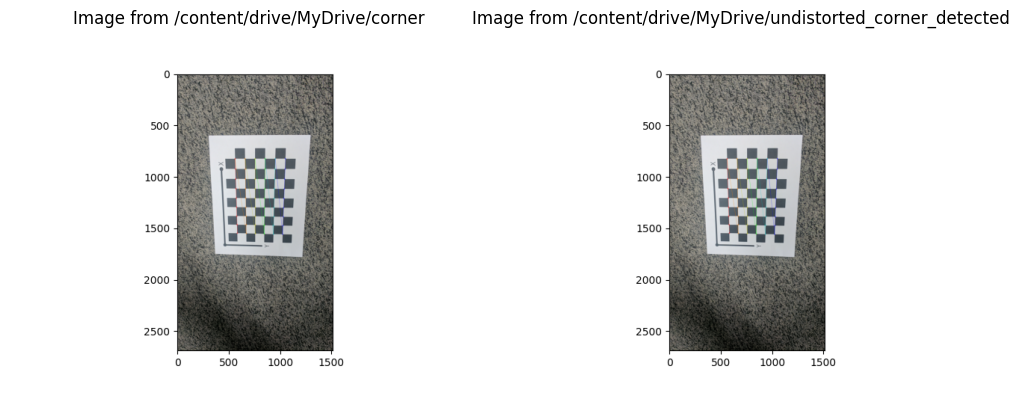

Saved row image: output_rows/row_4.png


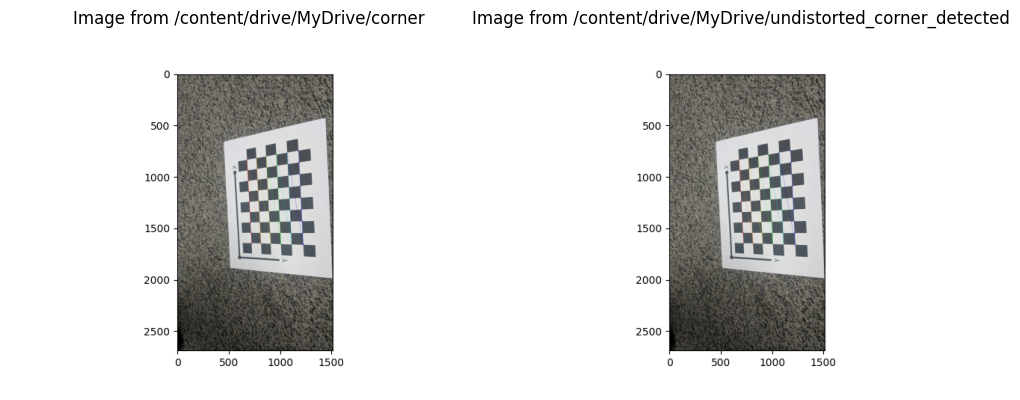

Saved row image: output_rows/row_5.png


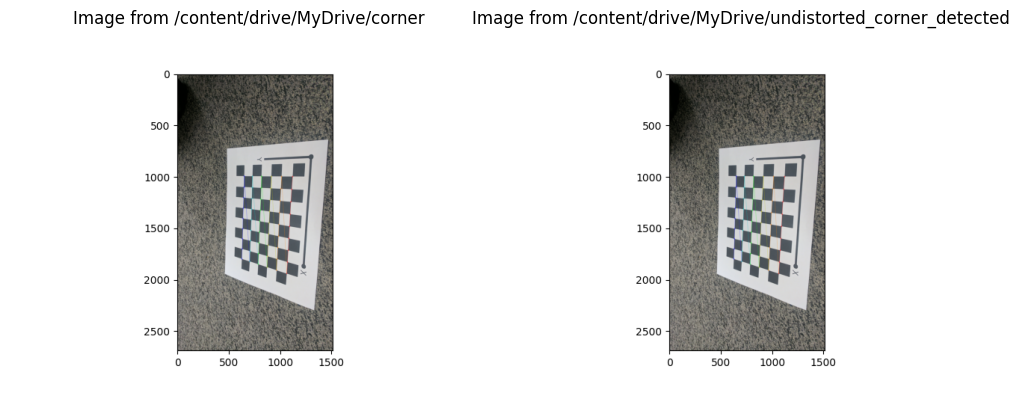

Saved row image: output_rows/row_6.png


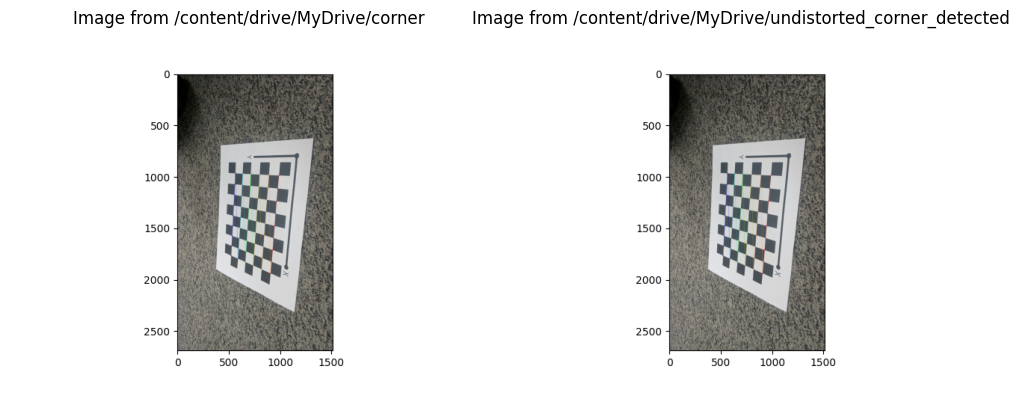

Saved row image: output_rows/row_7.png


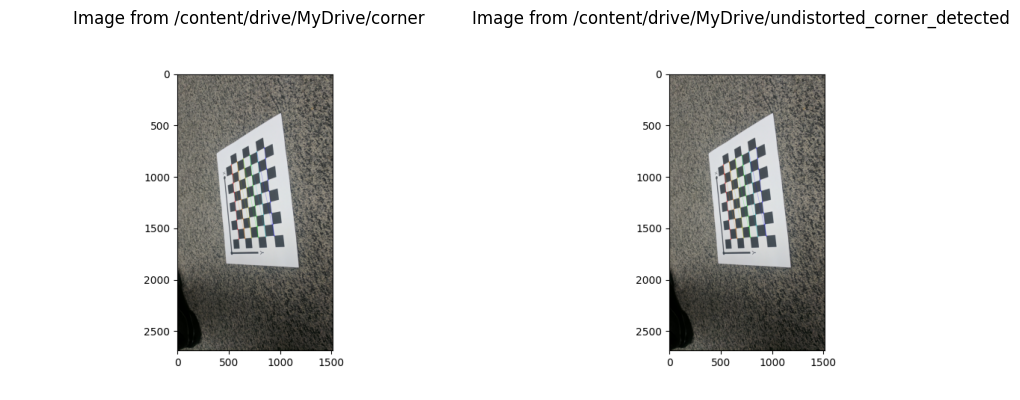

Saved row image: output_rows/row_8.png


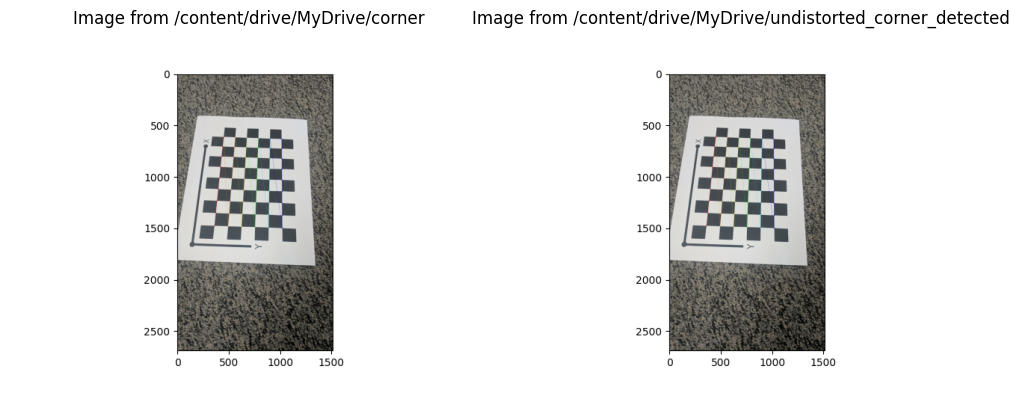

Saved row image: output_rows/row_9.png


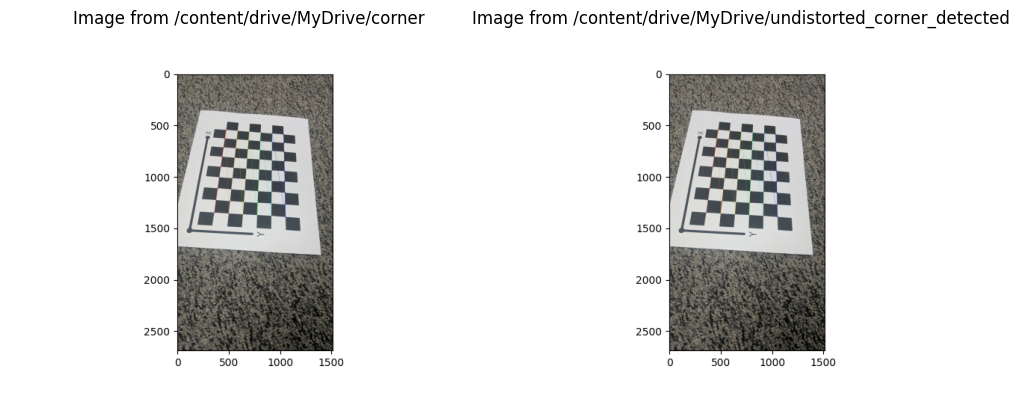

Saved row image: output_rows/row_10.png


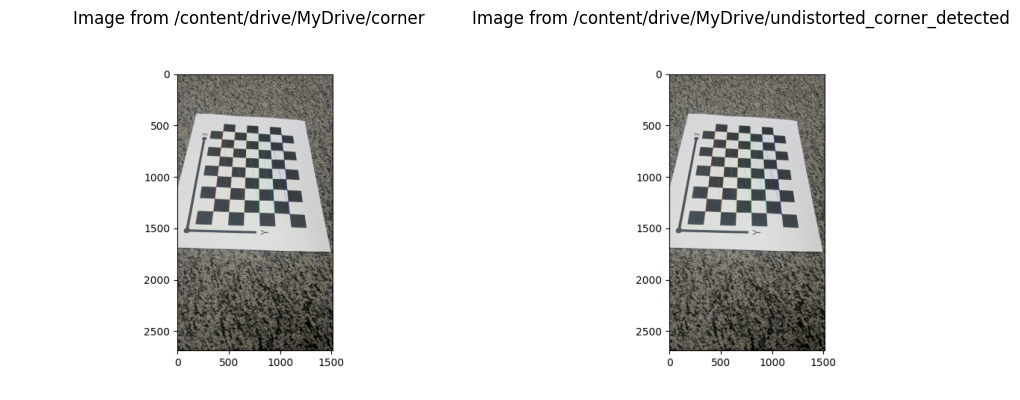

Saved row image: output_rows/row_11.png


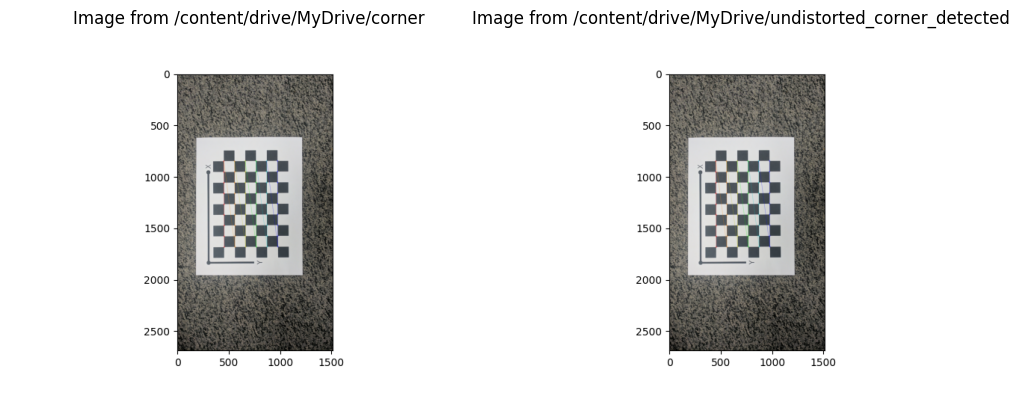

Saved row image: output_rows/row_12.png


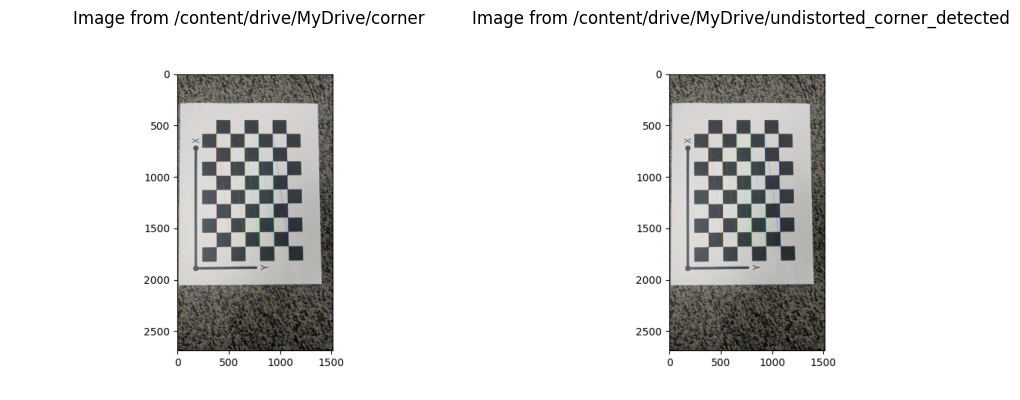

In [10]:
# Code to visualise

import os
import cv2
import matplotlib.pyplot as plt

def display_images_side_by_side(dir1, dir2, output_dir="output_rows"):

    os.makedirs(output_dir, exist_ok=True)


    images_dir1 = sorted([file for file in os.listdir(dir1) if file.endswith(('.png', '.jpeg', '.jpg'))])
    images_dir2 = sorted([file for file in os.listdir(dir2) if file.endswith(('.png', '.jpeg', '.jpg'))])


    assert len(images_dir1) == len(images_dir2), "Both directories must have the same number of images."


    for i in range(len(images_dir1)):

        img_path1 = os.path.join(dir1, images_dir1[i])
        img_path2 = os.path.join(dir2, images_dir2[i])

        img1 = cv2.imread(img_path1)
        img2 = cv2.imread(img_path2)


        plt.figure(figsize=(10, 5))


        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.title(f"Image from {dir1}")
        plt.axis('off')


        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.title(f"Image from {dir2}")
        plt.axis('off')


        save_path = os.path.join(output_dir, f"row_{i}.png")
        plt.savefig(save_path)
        print(f"Saved row image: {save_path}")

        plt.tight_layout()
        plt.show()


display_images_side_by_side("/content/drive/MyDrive/corner", "/content/drive/MyDrive/undistorted_corner_detected")